# GAN

In [1]:

# train a generative adversarial network on a one-dimensional function
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

In [2]:
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [3]:
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model

In [4]:
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model
 

In [5]:
def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = ones((n, 1))
	return X, y

In [6]:
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

In [7]:
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = zeros((n, 1))
	return X, y

In [8]:
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
	# scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
	pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	pyplot.show()

In [80]:
def train(g_model, d_model, gan_model, latent_dim, n_epochs=5000, n_batch=128, n_eval=100):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim)

In [81]:
latent_dim = 5

In [82]:
discriminator = define_discriminator()

In [83]:
discriminator

In [84]:
genrator = define_generator(latent_dim)

In [85]:
genrator

In [86]:
gan_model = define_gan(genrator, discriminator)

In [87]:
gan_model

99 0.3700000047683716 0.8999999761581421


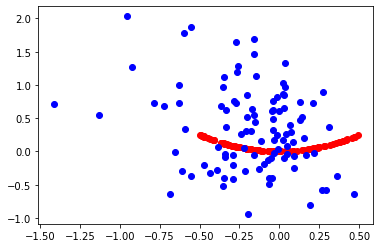

199 0.49000000953674316 0.75


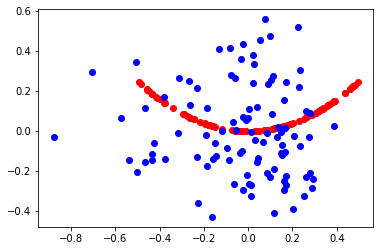

299 0.8299999833106995 0.2800000011920929


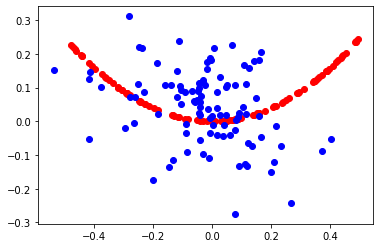

399 0.9399999976158142 0.07000000029802322


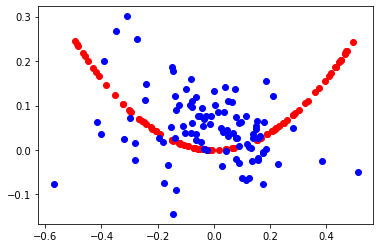

499 1.0 0.03999999910593033


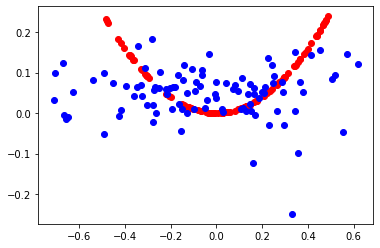

599 0.5400000214576721 0.5


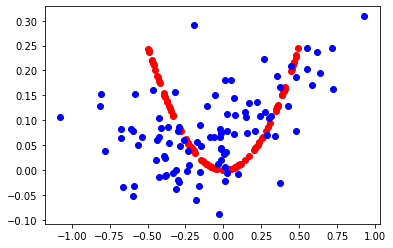

699 0.7200000286102295 0.4699999988079071


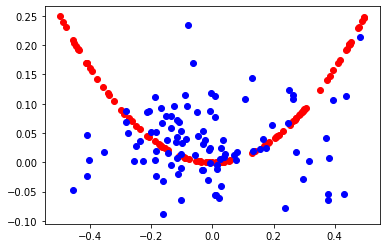

799 0.8299999833106995 0.3199999928474426


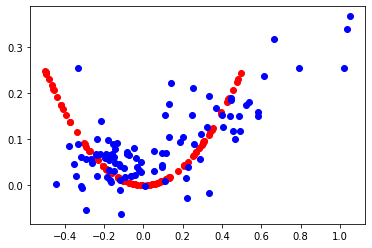

899 0.38999998569488525 0.7799999713897705


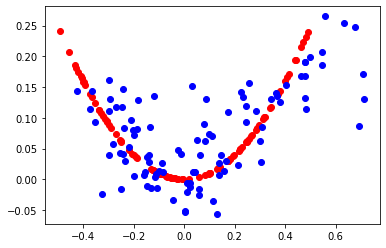

999 0.4699999988079071 0.6600000262260437


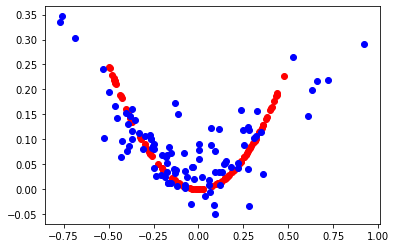

1099 0.6299999952316284 0.6600000262260437


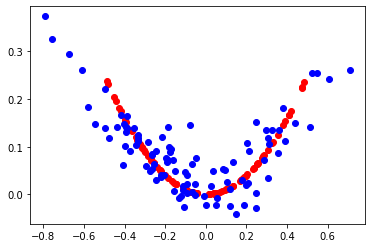

1199 0.6000000238418579 0.5299999713897705


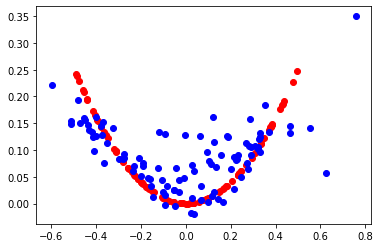

1299 0.6800000071525574 0.7099999785423279


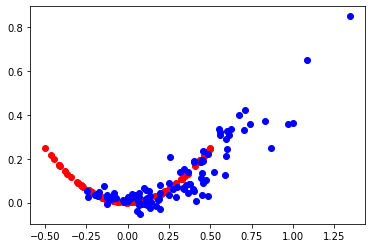

1399 0.4099999964237213 0.5600000023841858


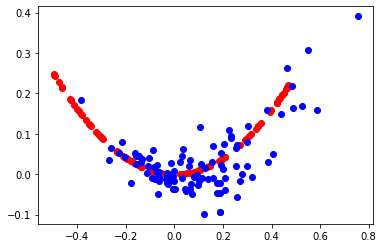

1499 0.36000001430511475 1.0


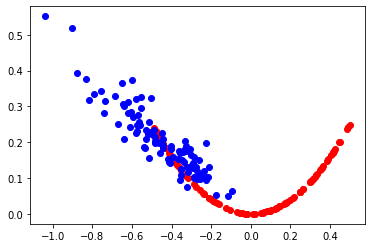

1599 0.36000001430511475 0.47999998927116394


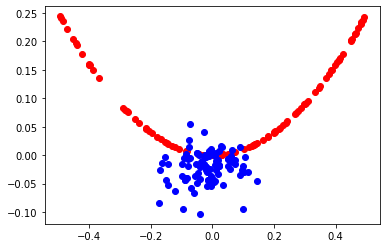

1699 0.6800000071525574 0.10999999940395355


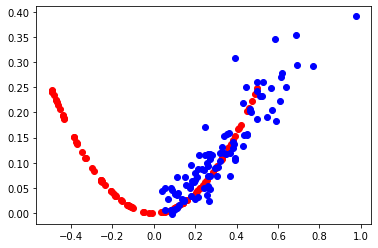

1799 0.23999999463558197 1.0


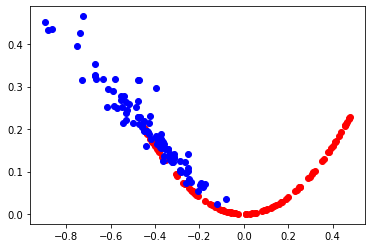

1899 0.44999998807907104 1.0


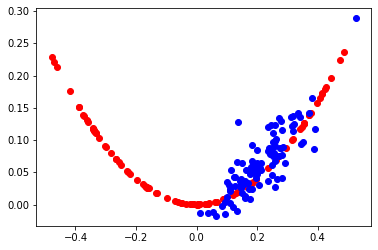

1999 0.4099999964237213 1.0


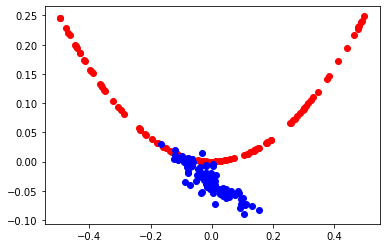

2099 0.49000000953674316 0.9300000071525574


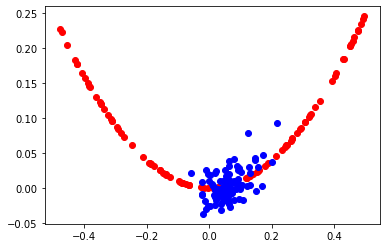

2199 0.38999998569488525 0.8299999833106995


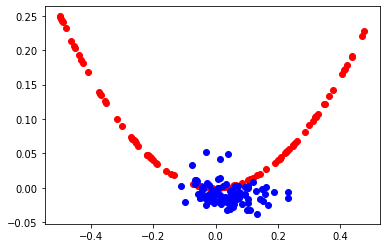

2299 0.4699999988079071 0.9900000095367432


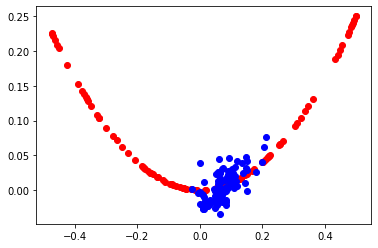

2399 0.4099999964237213 1.0


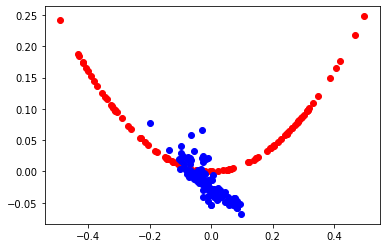

2499 0.4699999988079071 1.0


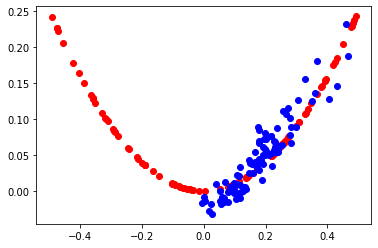

2599 0.28999999165534973 1.0


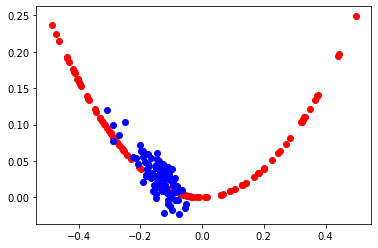

2699 0.4300000071525574 1.0


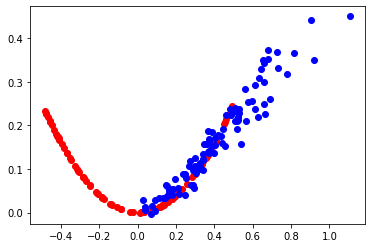

2799 0.5600000023841858 0.3700000047683716


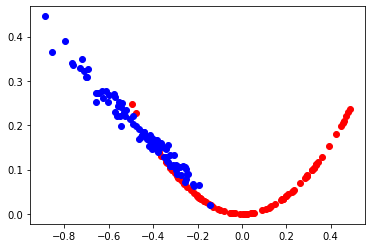

2899 0.3499999940395355 0.12999999523162842


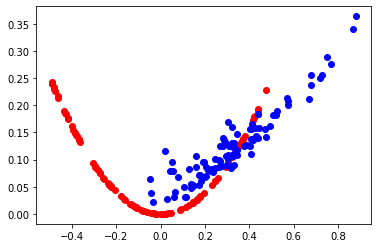

2999 0.5 0.8100000023841858


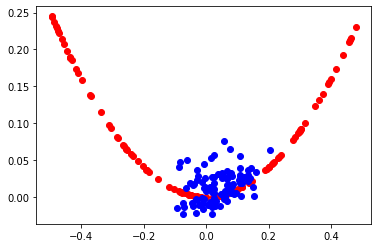

3099 0.38999998569488525 1.0


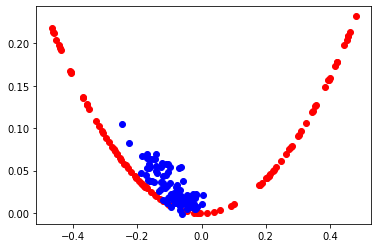

3199 0.49000000953674316 1.0


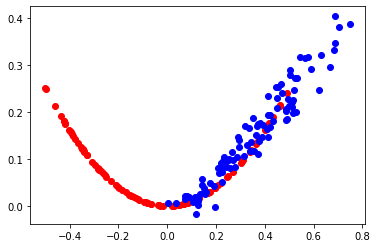

3299 0.47999998927116394 0.0


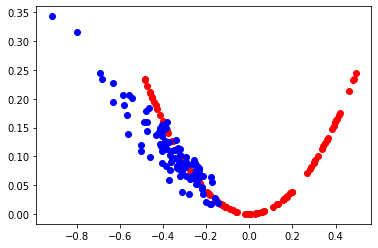

3399 0.44999998807907104 0.7799999713897705


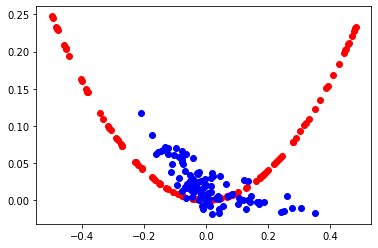

3499 0.47999998927116394 1.0


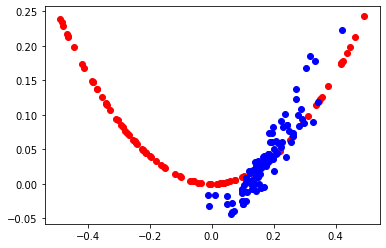

3599 0.44999998807907104 0.0


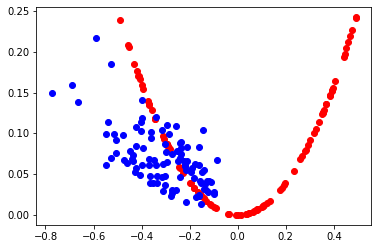

3699 0.5 0.8500000238418579


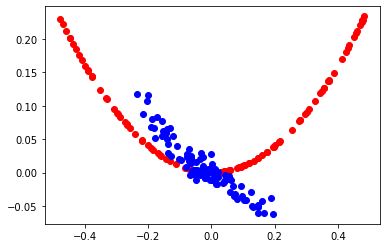

3799 0.3700000047683716 1.0


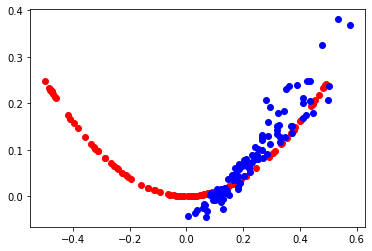

3899 0.44999998807907104 0.25999999046325684


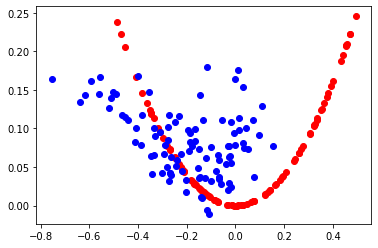

3999 0.4000000059604645 1.0


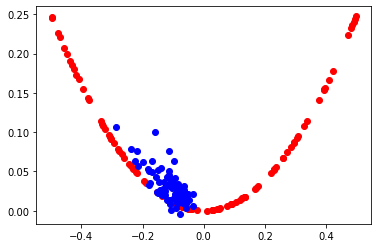

4099 0.550000011920929 0.7400000095367432


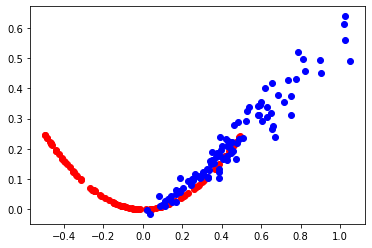

4199 0.49000000953674316 0.8600000143051147


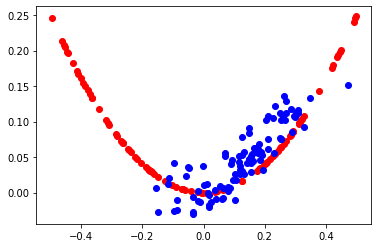

4299 0.3400000035762787 1.0


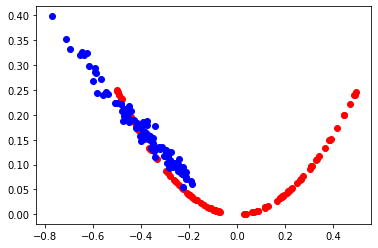

4399 0.5199999809265137 0.3499999940395355


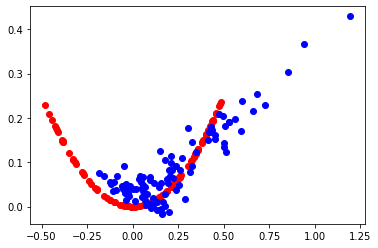

4499 0.33000001311302185 1.0


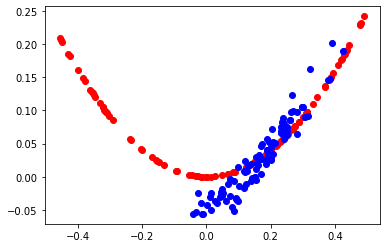

4599 0.4300000071525574 0.36000001430511475


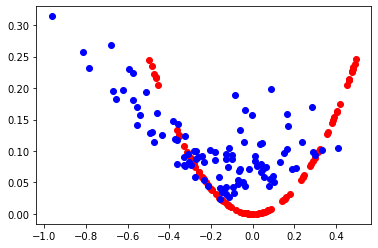

4699 0.3400000035762787 1.0


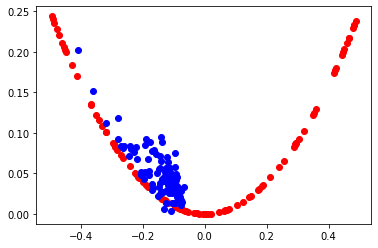

4799 0.47999998927116394 0.3100000023841858


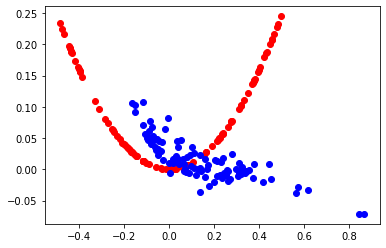

4899 0.41999998688697815 1.0


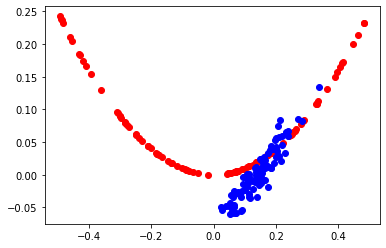

4999 0.5199999809265137 1.0


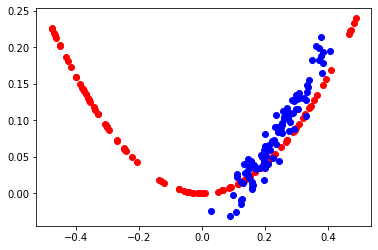

In [89]:
train(genrator, discriminator, gan_model, latent_dim)

In [ ]:
data =generate_real_samples(100)

In [64]:
pyplot.scatter(data[:,0],data[:,1])

TypeError: tuple indices must be integers or slices, not tuple

In [65]:
data

(array([[-2.79343615e-01,  7.80328553e-02],
        [-8.59091187e-02,  7.38037667e-03],
        [-4.59138966e-01,  2.10808590e-01],
        [-4.45976019e-01,  1.98894609e-01],
        [ 3.01244174e-01,  9.07480522e-02],
        [ 3.21471950e-01,  1.03344214e-01],
        [-4.78509368e-01,  2.28971215e-01],
        [-2.31021973e-01,  5.33711522e-02],
        [ 1.78389733e-01,  3.18228969e-02],
        [ 3.99667732e-01,  1.59734296e-01],
        [ 2.61831166e-01,  6.85555594e-02],
        [-4.64577904e-01,  2.15832629e-01],
        [-2.58797465e-01,  6.69761280e-02],
        [ 4.82044946e-02,  2.32367330e-03],
        [-2.21470699e-01,  4.90492705e-02],
        [-1.13858122e-01,  1.29636719e-02],
        [ 4.54747676e-01,  2.06795449e-01],
        [-3.51560825e-01,  1.23595014e-01],
        [-2.55594973e-01,  6.53287903e-02],
        [-4.99131258e-01,  2.49132013e-01],
        [ 4.39095868e-01,  1.92805182e-01],
        [-4.49585204e-01,  2.02126856e-01],
        [-2.61015083e-01,  6.812

In [52]:
x,y=generate_fake_samples(gan_model, latent_dim, 10)

In [66]:
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

TypeError: tuple indices must be integers or slices, not tuple

In [60]:
def generate_samples(n=100):
	# generate random inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2 (quadratic)
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	return hstack((X1, X2))

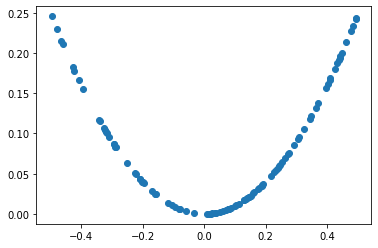

In [61]:
data = generate_samples()
# plot samples
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

In [62]:
data

array([[-2.07334367e-01,  4.29875399e-02],
       [-1.18721073e-01,  1.40946932e-02],
       [ 3.63079560e-01,  1.31826767e-01],
       [ 3.70740061e-01,  1.37448193e-01],
       [-5.95027789e-02,  3.54058069e-03],
       [ 4.62144420e-01,  2.13577465e-01],
       [-2.88424454e-01,  8.31886657e-02],
       [ 1.45971514e-01,  2.13076830e-02],
       [ 4.24167512e-01,  1.79918078e-01],
       [ 3.95657808e-01,  1.56545101e-01],
       [-1.98174126e-01,  3.92729842e-02],
       [ 6.17739706e-02,  3.81602344e-03],
       [ 4.32623160e-01,  1.87162798e-01],
       [ 1.44282525e-01,  2.08174471e-02],
       [ 4.92104212e-01,  2.42166555e-01],
       [ 4.76873417e-01,  2.27408256e-01],
       [-3.28439731e-02,  1.07872657e-03],
       [ 3.43910989e-02,  1.18274768e-03],
       [-3.19641507e-01,  1.02170693e-01],
       [ 1.91466423e-01,  3.66593911e-02],
       [ 8.61320109e-02,  7.41872331e-03],
       [ 3.43945906e-01,  1.18298786e-01],
       [ 2.64548793e-02,  6.99860641e-04],
       [ 1.

In [69]:
x_gan = generate_latent_points(latent_dim, 128)

In [70]:
x_gan

array([[-3.79873190e-01,  5.52398647e-01, -1.32404419e+00,
         5.02882658e-01,  1.00812120e-01],
       [ 6.91485716e-01,  1.59719949e+00,  6.80726545e-01,
        -2.46573902e-01, -7.98915388e-01],
       [ 1.47881707e+00,  4.53082422e-01,  1.17899835e+00,
         9.07422046e-01, -2.55680498e-01],
       [ 8.12356862e-01,  2.69199448e-01, -3.56190185e-01,
        -1.26210830e+00, -9.44549332e-01],
       [ 2.05187499e+00, -1.21544836e+00, -9.15514736e-01,
         5.74979562e-01, -7.45687481e-01],
       [ 7.59943125e-01,  8.43011634e-01, -1.00034476e+00,
         1.05014793e-01,  5.14482546e-02],
       [ 3.79276444e-01,  7.98937580e-01,  8.20617967e-02,
         1.04734714e+00,  6.36728924e-01],
       [ 8.68448760e-01,  4.03620758e-01,  5.04174909e-01,
         1.29249899e+00, -1.22693358e+00],
       [-1.50600327e+00,  6.12182844e-01,  4.93518469e-01,
         2.36903225e-01,  1.34252809e-01],
       [-5.87870764e-01,  7.41879898e-01, -1.00849560e+00,
         1.08588164e+00

In [71]:
y_gan = ones((128, 1))

In [72]:
y_gan

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [75]:
gan_model.train_on_batch(x_gan,y_gan)

0.702976405620575

In [76]:
x_gan[0]

array([-0.37987319,  0.55239865, -1.32404419,  0.50288266,  0.10081212])

In [79]:
gan_model.predict(x_gan)

array([[0.5063695 ],
       [0.49632415],
       [0.5013333 ],
       [0.4915959 ],
       [0.47890443],
       [0.5009345 ],
       [0.47788355],
       [0.5011483 ],
       [0.49221322],
       [0.5011215 ],
       [0.49974903],
       [0.50680804],
       [0.5020594 ],
       [0.50814694],
       [0.4927584 ],
       [0.49408942],
       [0.47519046],
       [0.49484918],
       [0.4953449 ],
       [0.5028652 ],
       [0.50196916],
       [0.5075932 ],
       [0.49016476],
       [0.50079775],
       [0.51478773],
       [0.4848284 ],
       [0.4977798 ],
       [0.50425535],
       [0.49805126],
       [0.47263908],
       [0.5088917 ],
       [0.49534956],
       [0.48783144],
       [0.482909  ],
       [0.48147187],
       [0.48372602],
       [0.5028044 ],
       [0.49937862],
       [0.48875603],
       [0.5000452 ],
       [0.4890211 ],
       [0.49947822],
       [0.48941705],
       [0.5028948 ],
       [0.47359213],
       [0.4913211 ],
       [0.50306356],
       [0.502